# Principal Component Analysis with Iris Dataset

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline
%matplotlib notebook

# Load Iris dataset
The Iris Dataset [here](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).  
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [3]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='FlowerType')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>


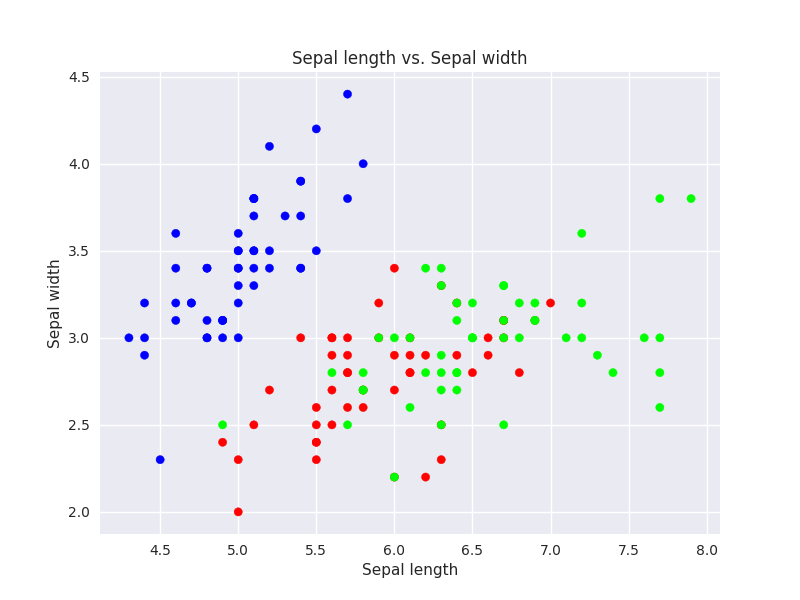

In [4]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], s=35, c=y, cmap=plt.cm.brg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs. Sepal width')
plt.show()

# PCA
Can we reduce the dimensionality of our dataset withour losing much information? PCA will help us decide.

In [5]:
pca_iris = PCA(n_components=3).fit(iris.data)

In [6]:
pca_iris.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514])

In [7]:
pca_iris.transform(iris.data)

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

The P.C. #0 explained variance is one order of magnitude higher than P.C. #1 and #2, and two orders of magnitude higher than P.C. #3. We can us use this knowledge to reduce our dataset from 4D to 3D.

We could have done everything in one line by setting the number of components we want (3), fitting the PCA and transforming it to 3D:

In [11]:
iris_reduced = PCA(n_components=3).fit(iris.data)

In [12]:
iris_reduced.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091]])

In [13]:
iris_reduced = PCA(n_components=3).fit_transform(iris.data)

<IPython.core.display.Javascript object>


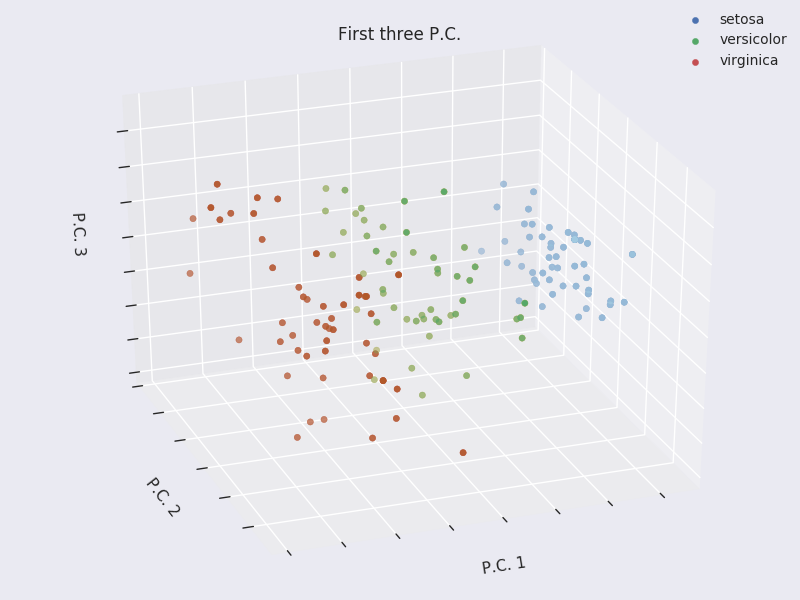

In [14]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris_reduced[:, 0], iris_reduced[:, 1], iris_reduced[:, 2],
           cmap=plt.cm.Paired, c=iris.target)
for k in range(3):
    ax.scatter(iris_reduced[y==k, 0], iris_reduced[y==k, 1], iris_reduced[y==k, 2], label=iris.target_names[k])
ax.set_title("First three P.C.")
ax.set_xlabel("P.C. 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("P.C. 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("P.C. 3")
ax.w_zaxis.set_ticklabels([])
plt.legend(numpoints=1)
plt.show()